In [65]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date
import openpyxl

In [66]:
df=pd.read_excel(r"data\Google_Data.xlsx")

In [67]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-02 16:00:00.288,52.65,53.80,52.65,53.66,1588268
1,2018-01-03 16:00:00.288,53.70,54.81,53.67,54.58,1565945
2,2018-01-04 16:00:00.288,54.85,55.20,54.71,54.79,1302569
3,2018-01-05 16:00:00.288,55.17,55.68,55.09,55.51,1512526
4,2018-01-08 16:00:00.288,55.55,55.96,55.50,55.71,1232221


In [68]:
df.tail()

,Date,Open,High,Low,Close,Volume
1254,2022-12-23 16:00:00.288,87.11,89.55,87.07,89.23,23003035
1255,2022-12-27 16:00:00.288,88.80,88.94,87.01,87.39,20097346
1256,2022-12-28 16:00:00.288,86.98,88.04,85.94,86.02,19523176
1257,2022-12-29 16:00:00.288,86.62,88.85,86.61,88.45,23333537
1258,2022-12-30 16:00:00.288,86.98,88.30,86.57,88.23,23986297


In [69]:
df.shape

(1259, 6)

Text(0, 0.5, 'close price in us$')

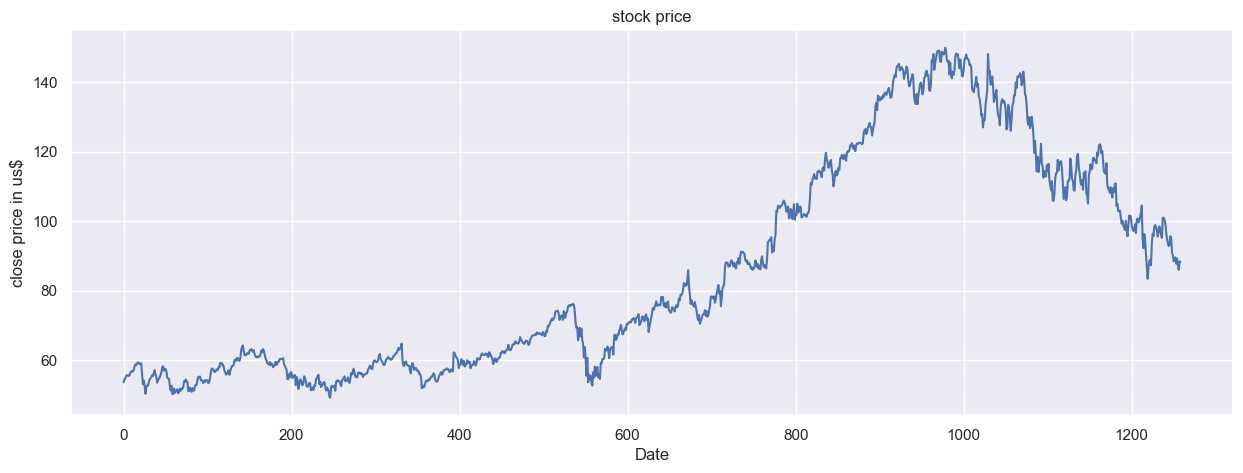

In [70]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("stock price")
plt.xlabel("Date")
plt.ylabel("close price in us$")
          

# seperate out the columns as we will be working on the closing values

In [71]:
close=df.filter(["Close"])

In [72]:
close.head()

,Close
0,53.66
1,54.58
2,54.79
3,55.51
4,55.71


In [73]:
close_stock=close.values

In [74]:
type(close_stock)

numpy.ndarray

# prepare and scale the training data

In [75]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [76]:
training_data_length

1008

In [77]:
mms=MinMaxScaler(feature_range=(0,1))


In [78]:
scaled_close_stock=mms.fit_transform(close_stock)

In [79]:
training_data=scaled_close_stock[0:training_data_length,:]


In [80]:
len(training_data)

1008

# make X_train and y_train

In [81]:
X_train=[]
y_train=[]

In [82]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

# Change X-train and Y_train to Numpy arrays

In [83]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [84]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [85]:
print(X_train.ndim)
print(X_train.shape)

2
(948, 60)


# RNN needs data in 3 Dimensions , number of samples , Number of Time steps and number of features so we need to reshape the data

In [86]:
print(X_train.shape)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

(948, 60)


In [87]:
X_train.shape

(948, 60, 1)

In [88]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [89]:
model=Sequential()

# input_shape=number of time steps and number of features. In this case the number of feature is 1

In [90]:
model.add(LSTM(units=50, return_sequences= True, input_shape= (X_train.shape[1], 1)))

#addiing a second LSTM Layer and some Dropout regularisution

model.add(LSTM(units= 50, return_sequences =True)) 
#addting a third LST Layer and some Dropout regularisation

model.add(LSTM(units= 50, return_sequences =True)) 
#adding fourth LSTM Layer and some Dropout regularisation

model.add(LSTM(units=50))

In [91]:
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mean_squared_error")

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 10s 71ms/step - loss: 0.0214
Epoch 2/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0022
Epoch 3/50
30/30 [==============================] - 2s 76ms/step - loss: 0.0016
Epoch 4/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0016
Epoch 5/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0016
Epoch 6/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0015
Epoch 7/50
30/30 [==============================] - 2s 75ms/step - loss: 0.0014
Epoch 8/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0015
Epoch 9/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0017
Epoch 10/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0015
Epoch 11/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0017
Epoch 12/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0013
Epoch 13/50
30/30 [=================

# prepare and reshape the data

In [94]:
test_data=scaled_close_stock[training_data_length-60:,:]

In [95]:
training_data_length

1008

In [96]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [97]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [98]:
len(X_test)

251

In [99]:
X_test=np.array(X_test)

In [100]:
X_test.shape

(251, 60)

In [101]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make predictions

In [102]:
y_pred=model.predict(X_test)

8/8 [==============================] - 2s 26ms/step


In [103]:
y_pred=mms.inverse_transform(y_pred)

In [104]:
pd.DataFrame(y_pred)

,0
0,146.231918
1,145.904373
2,145.458496
3,144.410721
4,142.964371
...,...
246,91.316109
247,90.790215
248,90.402153
249,90.009583


# plot the data

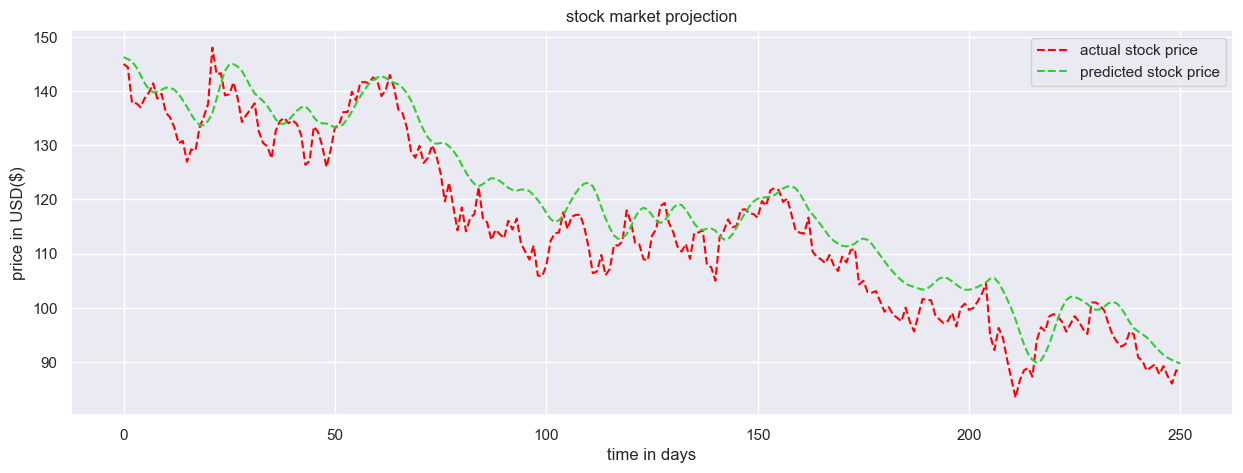

In [105]:
# visualizing the result
plt.figure(figsize=(15,5))
plt.plot(y_test,color="red",label="actual stock price",ls='--')
plt.plot(y_pred,color="limegreen",label="predicted stock price",ls="--")
plt.title("stock market projection")
plt.xlabel("time in days")
plt.ylabel("price in USD($)")
plt.legend()
plt.show()

# plot the whole data training , testing and prediction data together

In [109]:
train=close[:training_data_length]
test=close[training_data_length:]
test["pred"]=y_pred

C:\Users\Harsh\AppData\Local\Temp\ipykernel_50904\3293527819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred"]=y_pred


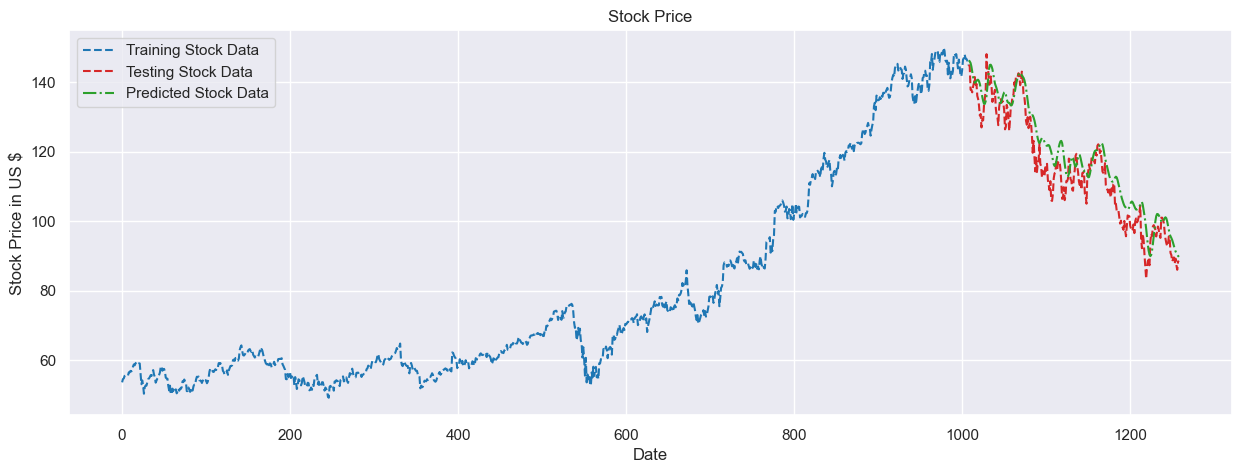

In [111]:
plt.figure(figsize=(15,5))

plt.plot(train['Close'], color = 'tab:blue', label= 'Training Stock Data', ls='--')

plt.plot(test['Close'], color = 'tab:red', label= 'Testing Stock Data', ls='--')

plt.plot(test['pred'], color = 'tab:green', label ='Predicted Stock Data', ls='dashdot')

plt.title('Stock Price')

plt.xlabel('Date')

plt.ylabel('Stock Price in US $')

plt.legend()

plt.show()